<a name='top'></a>
# Exploration Exercises

<a href='#wrangle'>1. / 2. Wrangle data</a>

<a href='#vizpairplots'>3. `plot_variable_pairs`</a>

<a href='#plotcategoricalandcontinuousvars'> 4. `plot_categorical_and_continuous_vars` </a>

<a href='#explorepy'>5. `explore.py`</a>

<a href='#exploring'>6. exploring</a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, product
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data

import wrangle as w

<a name='wrangle'></a>
1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

Get the data via `wrangle`

In [2]:
df = w.wrangle_zillow_data()
train, validate, test = w.split_zillow_data(df)

Returning saved csv file.


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169019 entries, 1174234 to 418158
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1169019 non-null  uint8  
 1   bathroomcnt                   1169019 non-null  float64
 2   calculatedfinishedsquarefeet  1169019 non-null  uint64 
 3   yearbuilt                     1169019 non-null  uint64 
 4   taxvaluedollarcnt             1169019 non-null  uint64 
 5   taxamount                     1169019 non-null  float64
 6   county                        1169019 non-null  object 
dtypes: float64(2), object(1), uint64(3), uint8(1)
memory usage: 63.5+ MB


<a href='#top'> Top </a>

<a name = 'vizpairplots'></a>

3. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
# def plot_variable_pairs(df,
#                         columns_x = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount'],
#                         columns_y = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount'],
#                         sampling = 1000):
#     pairs = product(columns_1, columns_2)
#     for pair in pairs:
#         sns.lmplot(x=pair[0], y=pair[1], data=df.sample(sampling), line_kws={'color': 'red'})
#         plt.show()

# #plot_variable_pairs(train)

<a href='#top'> Top </a>

<a name='plotcategoricalandcontinuousvars'></a>
4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [5]:
# def plot_categorical_and_continuous_vars(df,
#                                          columns_cat=['county'],
#                                          columns_cont=['calculatedfinishedsquarefeet', 'yearbuilt', 'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'taxamount']):
#     pairs = product(columns_cat, columns_cont)
#     for pair in pairs:
#         sns.set(rc={"figure.figsize":(15, 6)}) 
#         fig, axes = plt.subplots(1, 3)

#         sns.stripplot(x=pair[0], y=pair[1], data=df.sample(1000), ax = axes[0])
#         sns.boxplot(x=pair[0], y=pair[1], data=df.sample(1000), ax = axes[1])
#         sns.barplot(x=pair[0], y=pair[1], data=df.sample(1000), ax = axes[2])

#         plt.show

# #plot_categorical_and_continuous_vars(train)

<a href='#top'> Top </a>

<a name='explorepy'></a>
5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


In [6]:
import explore

In [7]:
# explore.plot_variable_pairs(train)

In [8]:
# explore.plot_categorical_and_continuous_vars(train)

<a href='#top'> Top </a>

<a name='exploring'></a>
6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Consider all the variables plotted against the target variable

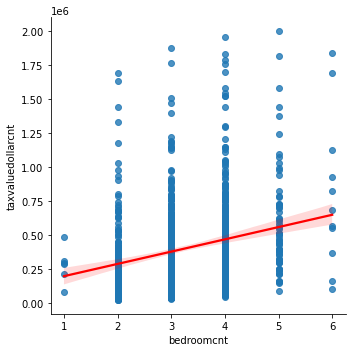

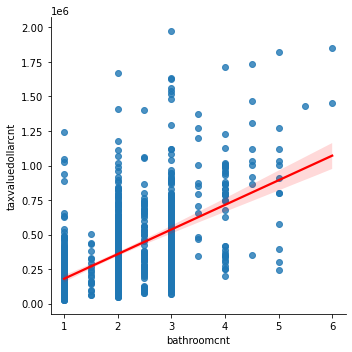

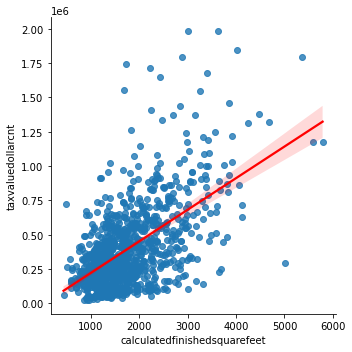

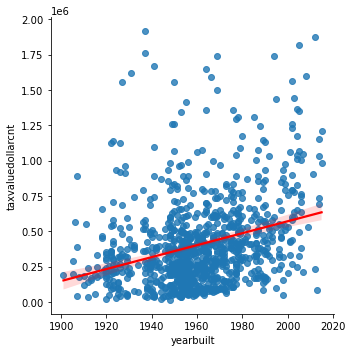

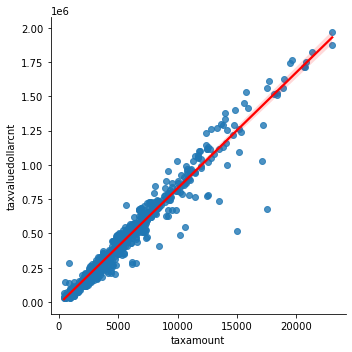

In [9]:
explore.plot_variable_pairs(train, columns_y=['taxvaluedollarcnt'], columns_x=['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount'])

All appear to be positively correlated.  Consider the histograms of the data.

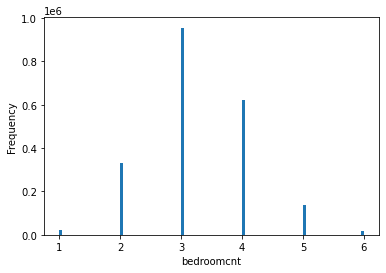

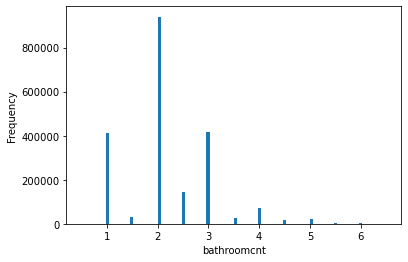

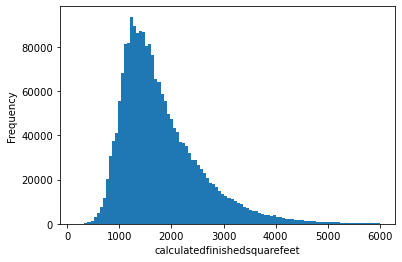

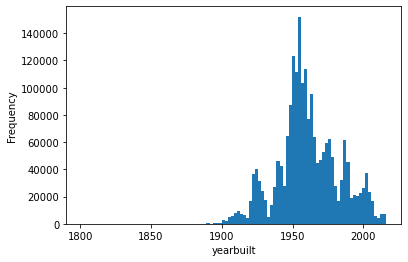

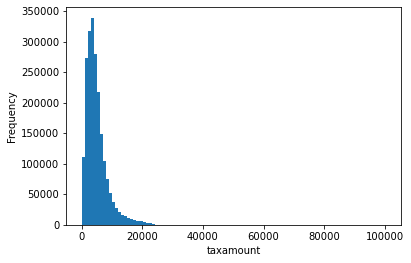

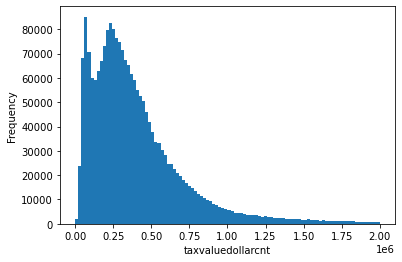

In [10]:
columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','taxvaluedollarcnt']
for column in columns:
    df[column].plot.hist(bins=100)
    plt.xlabel(column)
    plt.show()

Look a little closer at square feet. There are so many outliers, it might be better to exclude them from the data?  Need to go back to cut off the data. (NB: went back and cut off the houses that were over 6000 square feet, leaving 0.96 of the data).

In [11]:
df['calculatedfinishedsquarefeet'].describe()

count    2.087536e+06
mean     1.793481e+03
std      7.679453e+02
min      1.520000e+02
25%      1.252000e+03
50%      1.607000e+03
75%      2.158000e+03
max      6.000000e+03
Name: calculatedfinishedsquarefeet, dtype: float64

<AxesSubplot:ylabel='Frequency'>

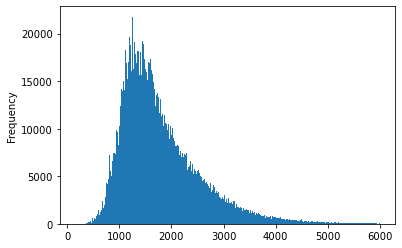

In [12]:
df[df['calculatedfinishedsquarefeet'] < 20_000]['calculatedfinishedsquarefeet'].plot.hist(bins=500)

Hypothesis test against all the continuous variables. Use correlation. This establishes if there is a linear correlation. Calculate the $r$ value too.

$H_0$ : There is not linear correlation between column1 and column2.

In [26]:

columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','taxvaluedollarcnt']
pairs = combinations(columns, 2)
alpha = 0.05
outputs = []
for pair in pairs:
    corr, p = stats.pearsonr(train[pair[0]], train[pair[1]])
    output = {
        'column1_x_column2':f"{pair[0]} x {pair[1]}",
        'r' : corr,
        'p-value' : p,
        'reject_null' : p < alpha
    }
    outputs.append(output)
corr_tests = pd.DataFrame(outputs)
corr_tests[corr_tests['column_x_column'].str.contains('taxvaluedollarcnt')].sort_values('r', ascending=False)

,column_x_column,r,p-value,reject_null
14,taxamount x taxvaluedollarcnt,0.976078,0.0,True
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.584173,0.0,True
8,bathroomcnt x taxvaluedollarcnt,0.508109,0.0,True
13,yearbuilt x taxvaluedollarcnt,0.275143,0.0,True
4,bedroomcnt x taxvaluedollarcnt,0.270649,0.0,True


Looks like `calculatedfinishedsquarefeet` is a good predictor of `taxvaluedollarcnt`.

Consider the grouped subsets of the counties.  Is there a difference between the other values?  

$H_0$ : The mean for value_x is different between county_x and not county_x.

In [31]:
counties = set(df.county.values)
pairs = product(counties, columns)
outputs = []
for pair in pairs:
    #subset into county_x and not county_x
    county_x = train[train.county == pair[0]]
    

('Orange', 'bedroomcnt')
('Orange', 'bathroomcnt')
('Orange', 'calculatedfinishedsquarefeet')
('Orange', 'yearbuilt')
('Orange', 'taxamount')
('Orange', 'taxvaluedollarcnt')
('Los Angeles', 'bedroomcnt')
('Los Angeles', 'bathroomcnt')
('Los Angeles', 'calculatedfinishedsquarefeet')
('Los Angeles', 'yearbuilt')
('Los Angeles', 'taxamount')
('Los Angeles', 'taxvaluedollarcnt')
('Ventura', 'bedroomcnt')
('Ventura', 'bathroomcnt')
('Ventura', 'calculatedfinishedsquarefeet')
('Ventura', 'yearbuilt')
('Ventura', 'taxamount')
('Ventura', 'taxvaluedollarcnt')


#### Appendix cells

In [13]:
def plot_variable_pairs(df):
    pairs = combinations(df.columns, 2)
    for pair in pairs:
        sns.lmplot(x=pair[0], y=pair[1], data=df.sample(1000), line_kws={'color': 'red'})
        plt.show()
        
#plot_variable_pairs(train.drop(columns=['county']))